In [34]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time

In [40]:
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test.nc")
u = ocean_data.u#+ocean_data.U
v = ocean_data.v#+ocean_data.V
b = ocean_data.b + ocean_data.B
# B = ocean_data.B
w = ocean_data.w
ocean_data 

AttributeError: 'Dataset' object has no attribute 'ε'

In [32]:
f = 2*(2*np.pi/(24*60*60))*np.sin(np.radians(45))
# (ocean_data.time*10**(-8))*(f/2*np.pi)
# ocean_data.time

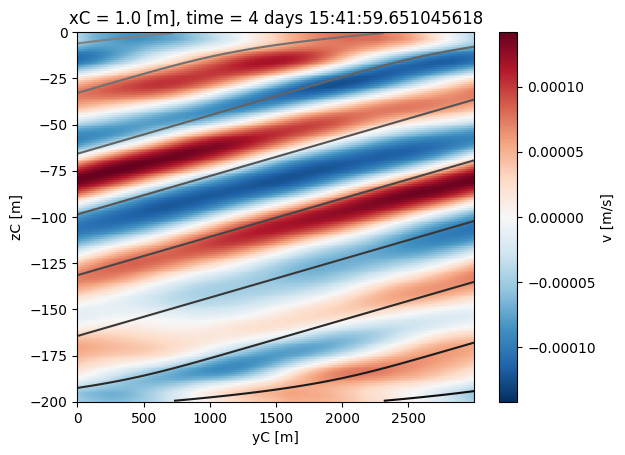

In [33]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
# show timw -20, -25, -30, -35
q = 66
v[q].plot()
# v[q].plot()
xr.plot.contour(b[q,:,:,0],levels=20,cmap="gray")
# plt.title("Small Pertubations w/0 Background")
plt.show()

b[1].plot()